In [11]:
using Turing, Distributions
using PyPlot, PyCall

K = 10
N = 51

T = [[0.272545164 6.5637631e-37 7.93970182e-6 8.61092244e-5 0.165656847 0.287081146 0.000218659173 4.06806091e-13 0.274399041 5.09466694e-6]       
 [0.0835696383 7.05396766e-6 0.206100213 1.52600546e-11 1.53908757e-8 6.5269808e-11 0.673013596 0.0193819808 0.0179275025 3.2272789e-18]       
 [0.886728867 8.63212428e-7 3.94046562e-11 0.110467781 1.11735715e-6 2.12946427e-18 5.16880247e-8 0.000236340361 0.00111600188 0.00144897701]  
 [8.16557898e-11 0.0168992485 6.27227283e-14 0.010767298 0.426756301 1.78050405e-9 6.41316248e-5 0.321159984 0.0369047216 0.187448314]       
 [0.130652141 4.70465408e-6 0.000473601393 0.0378509164 9.06618543e-10 0.000778622816 0.00029383779 0.829914494 8.69688804e-26 3.16817317e-5]  
 [0.223054659 0.288152163 7.35806925e-19 0.0185562602 1.73073908e-8 0.400936069 1.17437994e-12 0.0443974641 0.0249033671 7.2202285e-18]        
 [4.78064507e-16 0.320444079 0.00385904296 1.26156421e-9 0.00688364264 0.00447186979 0.156660567 0.169796226 0.333780163 0.00410440864]        
 [4.84470444e-13 2.5025163e-14 2.78748146e-7 0.00245132866 3.03033036e-12 0.00284425237 8.49830551e-7 6.60111797e-8 0.994702713 5.11768273e-7] 
 [0.16839645 1.80280379e-7 5.68958062e-11 0.134838199 0.00020810431 0.0861188042 0.0517409105 0.361825373 3.31239961e-11 0.196871978]          
 [0.0474764005 1.16126593e-6 5.96036112e-8 0.00128470373 1.30134792e-6 0.0374283978 0.310068428 2.27075277e-19 0.00647484474 0.597264703]] 

obs = [ 0.0,   7.72711051,   2.76189162,   8.8216901 ,
        10.80174329,   8.87655587,   0.47685358,   9.51892527,
         7.82538035,   5.52629325,  10.75167786,   5.94925434,
        -0.96912603,   1.65160838,   1.65005965,  -0.99642713,
         7.37803004,   5.40821392,   9.44046498,   8.51761132,
         9.76981763,   5.980154  ,   9.19558142,   5.33965621,
         6.2388448 ,   2.77755879,   6.67731151,   8.52411613,
        11.31057577,   8.11554144,   6.64705471,   8.02025435,
         9.84003587,   3.03943679,  -2.93966727,   2.04372567,
        -0.93734763,   3.66943525,   6.12876571,  -2.07758649,
         1.10420963,  -0.23197037,   3.64908206,  14.14671815,
         6.96651114,   7.28554932,   9.06049355,   6.54246834,
        11.22672275,   7.41962631,   8.45635411 ]

means   = zeros(Float64,K)
initial = ones(Float64, K)/K
for i = 1:K
    means[i] = i
end

@model big_hmm begin
    states = tzeros(Int,N)
    @assume states[1] ~ Categorical(initial)
    for i = 2:N
        @assume states[i] ~ Categorical(vec(T[states[i-1],:]))
        @observe obs[i] ~ Normal(means[states[i]], 4)
    end
    @predict states
end

# @time chain = sample(big_hmm, SMC(1000));
# @time chain = sample(big_hmm, PG(1000,100));

In [12]:
a2 = Array{Float64,1}()
for i=5000*(2.^(0:5))
    tic()
    chain = sample(big_hmm, SMC(i));
    t2 = toc();
    push!(a2, t2)
end


elapsed time: 2.55660395 seconds
elapsed time: 4.445068379 seconds
elapsed time: 9.633601483 seconds
elapsed time: 23.489827249 seconds
elapsed time: 53.047718379 seconds
elapsed time: 135.68230784 seconds


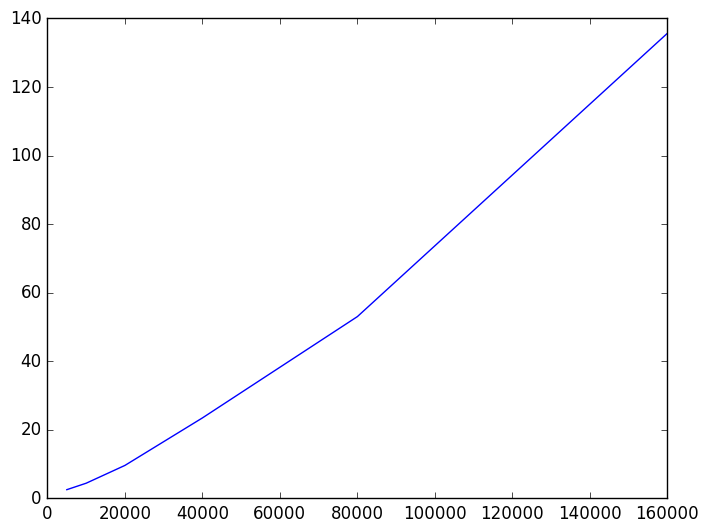

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32834abd0>

In [29]:
plot(5000*2.^(0:5),a2)